In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import utils

In [2]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
tokenizer.subwords[:10]

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br']

In [6]:
sample_string = "TensorFlow, from basics to mastery"

tokenized_string = tokenizer.encode(sample_string)
print (f"tokenized_string = {tokenized_string}")

original_string = tokenizer.decode(tokenized_string)
print (f"original_string = {original_string}")

for ts in tokenized_string:
    print(f"{ts}:\t{tokenizer.decode([ts])}")

tokenized_string = [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
original_string = TensorFlow, from basics to mastery
6307:	Ten
2327:	sor
4043:	Fl
2120:	ow
2:	, 
48:	from 
4249:	basi
4429:	cs 
7:	to 
2652:	master
8050:	y


In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
EMBEDDING_DIM = 64

In [8]:
train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
val_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [9]:
model = keras.Sequential([
    keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
391/391 [==============================] - 10s 27ms/step - loss: 0.6818 - accuracy: 0.5716 - val_loss: 0.6518 - val_accuracy: 0.6712
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 0.5806 - accuracy: 0.7586 - val_loss: 0.5218 - val_accuracy: 0.8317
Epoch 3/10
391/391 [==============================] - 10s 26ms/step - loss: 0.4512 - accuracy: 0.8607 - val_loss: 0.4299 - val_accuracy: 0.8529
Epoch 4/10
391/391 [==============================] - 11s 27ms/step - loss: 0.3677 - accuracy: 0.8910 - val_loss: 0.3785 - val_accuracy: 0.8704
Epoch 5/10
391/391 [==============================] - 10s 26ms/step - loss: 0.3121 - accuracy: 0.9084 - val_loss: 0.3562 - val_accuracy: 0.8744
Epoch 6/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2739 - accuracy: 0.9175 - val_loss: 0.3341 - val_accuracy: 0.8774
Epoch 7/10
391/391 [==============================] - 10s 27ms/step - loss: 0.2474 - accuracy: 0.9243 - val_loss: 0.3276 - val_accuracy:

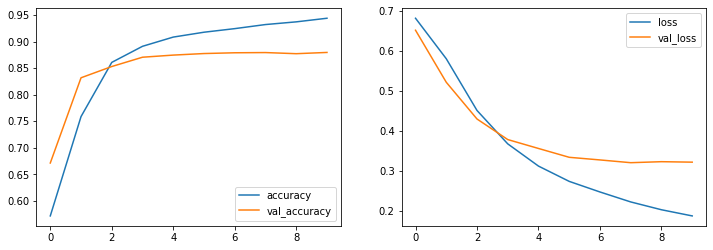

In [11]:
utils.plot_history(history)

In [12]:
utils.save_embeddings(tokenizer, model.layers[0])

In [13]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>